In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.exceptions import DataConversionWarning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from itertools import combinations
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import warnings
import logging
import pickle
import os

logging.getLogger("tensorflow").setLevel(logging.ERROR)
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [4]:
from google.colab import drive
drive.mount("/content/drive")
data_path = "/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/dynamic-feature-selection/Data/isam data"
root_reslts_path = "/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/dynamic-feature-selection/Results"

Mounted at /content/drive


In [8]:
def save_object(obj, filename,path):
    filename = os.path.join(path,filename)
    with open(filename+".pkl", 'wb') as outp:
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)
    outp.close()
def load_object(filename,path):
    filename = os.path.join(path,filename)
    with open(filename+".pkl", 'rb') as outp:
        loaded_object = pickle.load(outp)
    outp.close()
    return loaded_object

In [9]:
def plot_results(metric_name, methods_name, results, step=1):
    plt.figure(figsize=(15, 5))
    plt.title(metric_name)

    for k, result in enumerate(results):
        x_indices = np.arange(0, len(results[k]), step, dtype=np.int32)
        x = np.array(x_indices)
        y = np.array([x for i, x in enumerate(results[k]) if i % step == 0], dtype=np.int32)
        plt.plot(x, y, label=methods_name[k])
        plt.scatter(x, y, s=20)  # Add dots to the plot

    plt.legend(loc="best")
    plt.xlabel('Chunk number')
    plt.ylabel('Results per Chunk')

    # Format x-axis ticks as integers
    # plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(step))
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):.0f}'))

    # Format y-axis ticks as integers
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y):.0f}'))
    path = os.path.join(os.path.join(root_reslts_path, 'Imges'))
    os.makedirs(path, exist_ok=True)
    plt.savefig(os.path.join(path, metric_name))
    plt.savefig(os.path.join(path, metric_name+'.svg'), format='svg')
    plt.show()

In [10]:
# IramTariq-DMOZ-xssed--> D4-30
# Data_167_featurs--> Mokbal-2021(D2-167)
# IramTariq-DataTakenFromYunZhou--> D3-30
# Data_66_featurs--> D1-N66
filenames = ['IramTariq_Dmoz_xssed.csv','Data_167_featurs.csv','IramTariq_DataTakenFromYunZhou.csv','Data_66_featurs.csv']
methods_name = ['AC','IM','OA-OT','ALC','AutoEncoder','Statistics']
DATA_NAME = ["D4-30","D2-167","D3-30","D1-N66"]
filenames = list(map(lambda x: os.path.join(data_path, x), filenames))
filenames

['/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/dynamic-feature-selection/Data/isam data/IramTariq_Dmoz_xssed.csv',
 '/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/dynamic-feature-selection/Data/isam data/Data_167_featurs.csv',
 '/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/dynamic-feature-selection/Data/isam data/IramTariq_DataTakenFromYunZhou.csv',
 '/content/drive/MyDrive/Colab Notebooks/Muawiya/Js_Contana/dynamic-feature-selection/Data/isam data/Data_66_featurs.csv']

In [16]:
DFS_Reslts = {}

IramTariq_Dmoz_xssed_AC = [19,18,18,17,13,12,16,14,12]
IramTariq_Dmoz_xssed_IM = [13,21,21,10,10,19,26,19,20]
IramTariq_Dmoz_xssed_OAOT = [23,21,37,10,12,21,12,36,35]
IramTariq_Dmoz_xssed_ALC = [18,12,11,11,19,11,16,11,17]
DFS_Reslts['IramTariq_Dmoz_xssed'] = [IramTariq_Dmoz_xssed_AC,IramTariq_Dmoz_xssed_IM,IramTariq_Dmoz_xssed_OAOT,IramTariq_Dmoz_xssed_ALC]

Data_167_featurs_AC = [83,76,92,70,90,84,90,90,85]
Data_167_featurs_IM = [84,79,100,69,95,101,68,84,104]
Data_167_featurs_OAOT = [110,94,103,99,85,107,93,102,93]
Data_167_featurs_ALC = [87,82,86,88,62,82,74,91,72]
DFS_Reslts['Data_167_featurs'] = [Data_167_featurs_AC,Data_167_featurs_IM,Data_167_featurs_OAOT,Data_167_featurs_ALC]


IramTariq_DataTakenFromYunZhou_AC = [14,10,14,11,14,12,16,20,10]
IramTariq_DataTakenFromYunZhou_IM = [18,13,14,22,22,15,23,12,16]
IramTariq_DataTakenFromYunZhou_OAOT = [18,22,19,15,23,21,20,21,8]
IramTariq_DataTakenFromYunZhou_ALC  = [13,21,11,14,19,23,12,18,21]
DFS_Reslts['IramTariq_DataTakenFromYunZhou'] = [IramTariq_DataTakenFromYunZhou_AC,IramTariq_DataTakenFromYunZhou_IM,
                                                IramTariq_DataTakenFromYunZhou_OAOT,IramTariq_DataTakenFromYunZhou_ALC]


Data_66_featurs_AC = []
Data_66_featurs_IM = []
Data_66_featurs_OAOT = []
Data_66_featurs_ALC  = []

methods = os.listdir(os.path.join(root_reslts_path,'Data_66_featurs'))[::-1]
methods = [i[:-4] for i in methods if i[:7]=='softmax']
Data_66_featurs_results = os.path.join(root_reslts_path,'Data_66_featurs')

for i,_ in enumerate(methods):
  Data_66_featurs_AC.append(sum(load_object("softmax mask for chunk number "+str(i+1),Data_66_featurs_results)))
  Data_66_featurs_IM.append(sum(load_object("average mask for chunk number "+str(i+1),Data_66_featurs_results)))
  Data_66_featurs_OAOT.append(sum(load_object("single_agent mask for chunk number "+str(i+1),Data_66_featurs_results)))
  Data_66_featurs_ALC.append(sum(load_object("random_forest mask for chunk number "+str(i+1),Data_66_featurs_results)))


DFS_Reslts['Data_66_featurs'] = [Data_66_featurs_AC,Data_66_featurs_IM,Data_66_featurs_OAOT,Data_66_featurs_ALC]

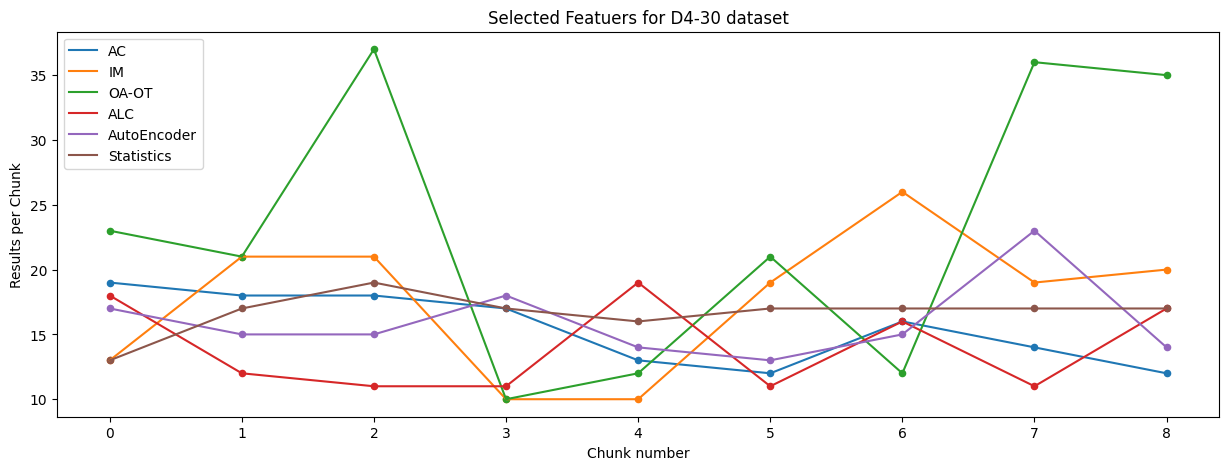

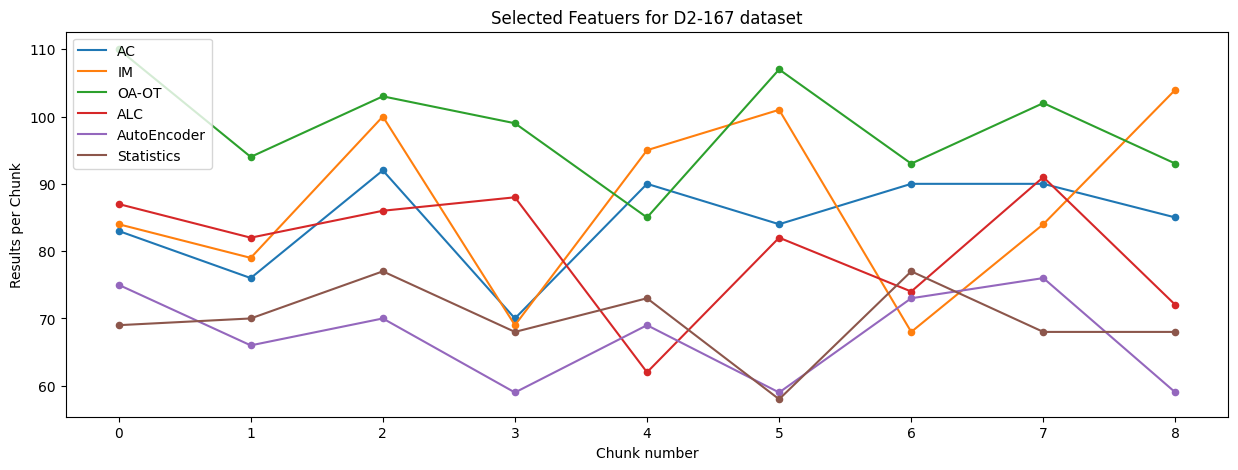

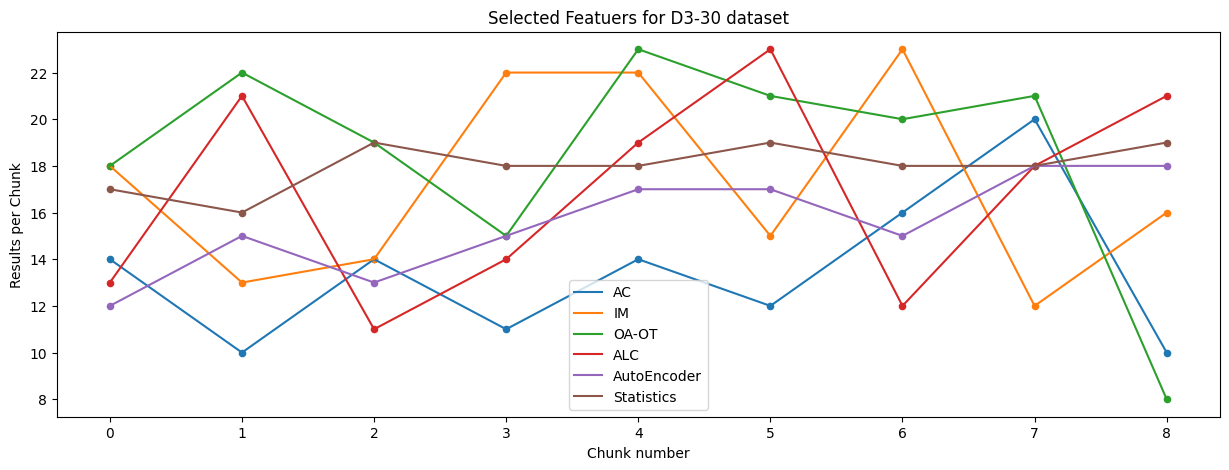

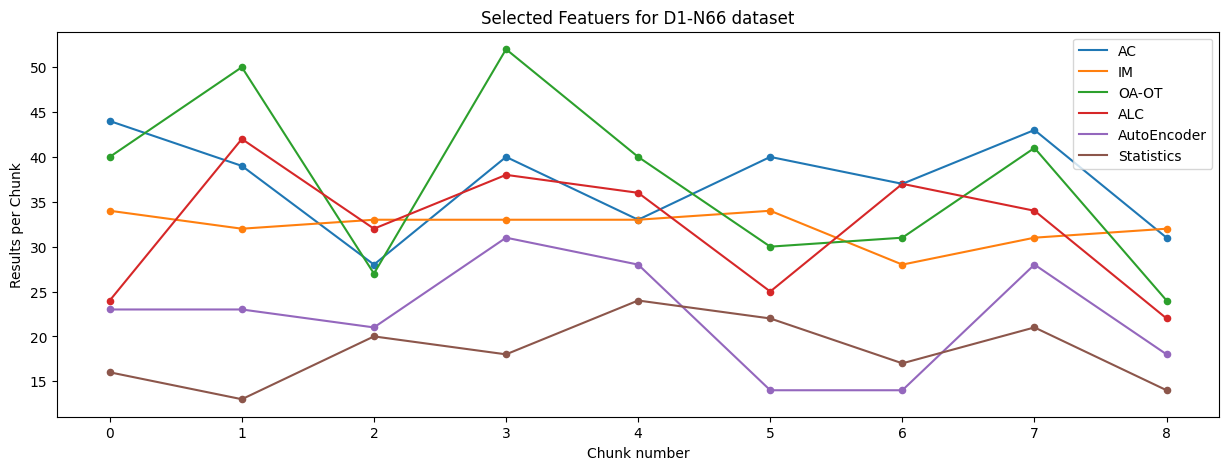

In [17]:
for j,filename in enumerate(filenames):
  name = filename.split("/")[-1].split(".")[0]
  reslts_path = os.path.join(root_reslts_path,name)
  results_statistics = load_object('results_statistics',reslts_path)
  results_AutoEncoder = load_object('results_AutoEncoder',reslts_path)
  statistics = []
  AutoEncoder = []
  for i in results_statistics.keys():
    if i == 9 :continue
    statistics.append(len(results_statistics[i][0][0]))
  for i in results_AutoEncoder.keys():
    if i == 9 :continue
    AutoEncoder.append(len(results_AutoEncoder[i][0][0]))
  DFS_Reslts[name].append(AutoEncoder)
  DFS_Reslts[name].append(statistics)

  plot_results("Selected Featuers for "+DATA_NAME[j]+" dataset", methods_name, DFS_Reslts[name], step=1)

In [18]:
df = pd.DataFrame.from_dict(DFS_Reslts, orient='index')
df = df.transpose()

df.head()



subheadings = ["D4-30","D2-167","D3-30","D1-N66"]
column_headings = ['AC','IM','OA-OT','ALC','AutoEncoder','Statistics']
columns = pd.MultiIndex.from_product([subheadings, column_headings])
df = pd.DataFrame(columns=columns)
for i,data_name in enumerate(DFS_Reslts.keys()):
  for k,column_heading in enumerate(column_headings):
    df[subheadings[i],column_heading] = DFS_Reslts[data_name][k]

print(df.shape)
df.to_csv(os.path.join(os.path.join(root_reslts_path,'Imges'),"Numerical Value for chunks.csv"),index=False)
df.head()

(9, 24)


D4-30                                      D2-167                 ... D3-30  \
     AC  IM OA-OT ALC AutoEncoder Statistics     AC   IM OA-OT ALC  ... OA-OT   
0    19  13    23  18          17         13     83   84   110  87  ...    18   
1    18  21    21  12          15         17     76   79    94  82  ...    22   
2    18  21    37  11          15         19     92  100   103  86  ...    19   
3    17  10    10  11          18         17     70   69    99  88  ...    15   
4    13  10    12  19          14         16     90   95    85  62  ...    23   

                             D1-N66                                       
  ALC AutoEncoder Statistics     AC  IM OA-OT ALC AutoEncoder Statistics  
0  13          12         17     44  34    40  24          23         16  
1  21          15         16     39  32    50  42          23         13  
2  11          13         19     28  33    27  32          21         20  
3  14          15         18     40  33    52  38          31         18  
4  19          17         18     33  33    40  36          28         24  

[5 rows x 24 columns]

# Results



In [ ]:
def load_res(res_name, method):
    st = res_name + '_' + method + '.pkl'
    with open(st , 'rb') as res:
        x = pickle.load(res)
    return x
chunks_results_stat = load_res('results', 'statistics')
chunks_results_encoder = load_res('results', 'AutoEncoder')
dataset_ordered = load_res('dataset', 'statistics')

In [ ]:
def save_res(method, res_array):
    st = 'selection_performance_results_' + method + '.pkl'
    with open(st, 'wb') as saved_res:
        pickle.dump(res_array, saved_res)

## classification

In [ ]:
def feature_selection_random_forest(data, classes):
    x_train, x_test, y_train, y_test = train_test_split(data, classes,test_size=0.3)
    model = SelectFromModel(RandomForestClassifier())
    model.fit(x_train, y_train)
    selected_features = model.get_support()
    return np.where(selected_features)

In [ ]:
def classification(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    DT_clf = GaussianNB()

    DT_clf.fit(X_train,Y_train)
    ypred=DT_clf.predict(X_test) #These are the predicted output values
    fscore = f1_score(Y_test,ypred, average='weighted')
    acc = accuracy_score(Y_test,ypred)
    percision = precision_score(Y_test,ypred, average='weighted')
    recall = recall_score(Y_test,ypred, average='weighted')
    return fscore, acc, percision, recall


## chunks predicton

In [ ]:
# Generate measures:

def get_results(chunks_results):
    N = 50
    chunk_res = []
    all_acc_org = []
    prev = []
    all_acc_selected = []
    all_selected_features = []

    for idx, samples in tqdm(enumerate(range(0,dataset_ordered.shape[0], N))):

        chunk_dataset = dataset_ordered[samples:min(samples+N, dataset_ordered.shape[0])]
        org_Data = np.array(chunk_dataset.loc[:, chunk_dataset.columns != 'Class'])
        classes = np.array(chunk_dataset['Class'])

        if idx not in chunks_results.keys():
            selected_features = prev
        else:
            selected_features = list(chunks_results[idx][0][0])

        selected_Data = org_Data[:, selected_features]

        fscore_org, acc_org, percision_org, recall_org = classification(org_Data, classes)
        all_acc_org.append(acc_org)

        fscore_selection, acc_selection, percision_selection, recall_selection = classification(selected_Data, classes)
        all_acc_selected.append(acc_selection)

        all_selected_features.append(selected_features)

        X = ((fscore_org, acc_org, percision_org, recall_org),
            (fscore_selection, acc_selection, percision_selection, recall_selection ),
        )
            #(fscore_selection_rf, acc_selection_rf, percision_selection_rf, recall_selection_rf),

        chunk_res.append(X)
        prev = selected_features

    return all_acc_org, all_acc_selected, all_selected_features, chunk_res

all_acc_org, all_acc_selected_stat, all_selected_features_stat, chunk_res_stat = get_results(chunks_results_stat)
all_acc_org, all_acc_selected_encoder, all_selected_features_encoder, chunk_res_encoder = get_results(chunks_results_encoder)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [ ]:
def build_table(all_selected_features, all_acc_org, all_acc_selected):
    df = pd.DataFrame({
        "selected_features numbers": all_selected_features,
        "accuary all features":all_acc_org,
        "accuarcy RL feature selection": all_acc_selected
    })
    pd.set_option('display.max_rows', None)  # or 1000
    pd.set_option('display.max_colwidth', -1)  # or 199
    df.style.set_sticky(axis = 1)
    return df

df_stat = build_table(all_selected_features_stat, all_acc_org, all_acc_selected_stat)
df_encoder = build_table(all_selected_features_encoder, all_acc_org, all_acc_selected_encoder)

In [ ]:
save_res('statistics', chunk_res_stat)
save_res('AutoEncoder', chunk_res_encoder)

# Plot results:

In [ ]:
selection_res_stat = load_res('selection_performance_results', 'statistics')
selection_res_encoder = load_res('selection_performance_results', 'AutoEncoder')

In [ ]:
# unzip the values...
def unzip(selection_res):
    x, y = zip(*selection_res)
    fscore_org, acc_org, percision_org, recall_org = zip(*x)
    fscore_selection, acc_selection, percision_selection, recall_selection = zip(*y)
    return fscore_org, acc_org, percision_org, recall_org , fscore_selection, acc_selection, percision_selection, recall_selection

fscore_org, acc_org, percision_org, recall_org , fscore_selection_stat, acc_selection_stat, percision_selection_stat, recall_selection_stat = unzip(selection_res_stat)
_, _, _, _ , fscore_selection_encoder, acc_selection_encoder, percision_selection_encoder, recall_selection_encoder = unzip(selection_res_encoder)


In [ ]:
def plot_criteria(Type, org_line, selection_line_stat , selection_line_encoder, fig_numbers, method):#, ):

    fig , ax = plt.subplots(fig_numbers,1, figsize=(20,20))
    N = 40
    for idx in range(1, fig_numbers+1):

      plt.subplot(fig_numbers,1,idx)
      legend_properties = {'weight':'bold', 'size': 12}

      plt.plot(org_line[(idx-1)*N:(idx-1)*N+N] , linewidth=3, marker ='.', markersize=12, color = "black")
      plt.plot(selection_line_stat[(idx-1)*N:(idx-1)*N+N] , linewidth=3, marker ='.', markersize=12, color ="purple")
      plt.plot(selection_line_encoder[(idx-1)*N:(idx-1)*N+N] , linewidth=3, marker ='.', markersize=12, color="blue")

      plt.title('compare ' + str(Type) + ' over time', fontsize=12, fontweight='bold')
      plt.xlabel('chunks', fontsize=12, fontweight='bold')
      plt.ylabel(str(Type) + ' value', fontsize=12, fontweight='bold')
      plt.grid(True)
      plt.xticks(range(N), np.arange((idx-1)*N+1, (idx-1)*N+N+1) , size='small', fontsize=12)

      plt.legend(['all features','selected features RL stat', 'selected features encoder'], loc='upper right' ,fontsize=12,prop = legend_properties)
      fig.tight_layout()
      plt.savefig(Type + '_res_' + method + '.png')

plot_criteria('f-score', fscore_org, fscore_selection_stat,fscore_selection_encoder , 10, '2methods')
plot_criteria('accuarcy', acc_org, acc_selection_stat,acc_selection_encoder , 10, '2methods')
plot_criteria('percision', percision_org, percision_selection_stat,percision_selection_encoder , 10, '2methods')
plot_criteria('recall', recall_org, recall_selection_stat,recall_selection_encoder , 10 , '2methods')


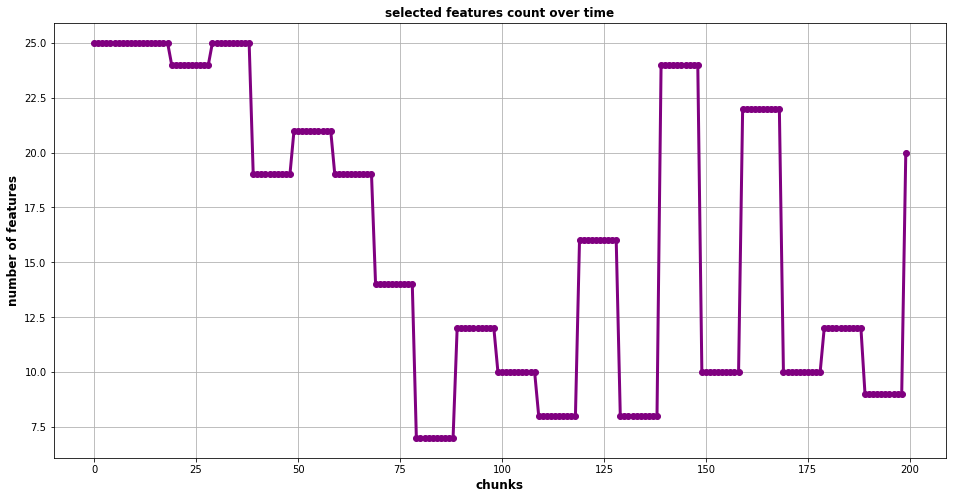

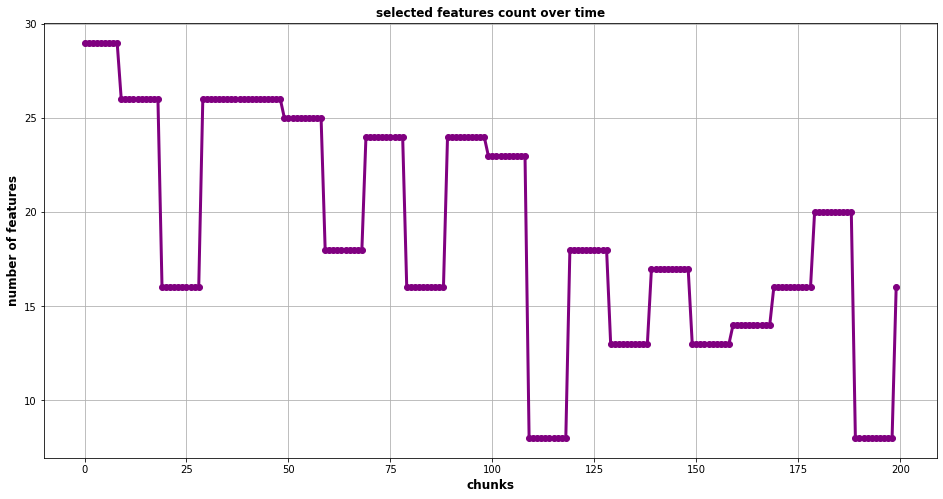

In [ ]:
def plot_number_selected_features(all_selected_features, st, en, method):

    arr = [len(i) for i in all_selected_features]

    plt.figure(figsize=(16,8))
    plt.plot(arr[st:en], linewidth=3, marker ='.', markersize=12, color = "purple")
    plt.title('selected features count over time', fontsize=12, fontweight='bold')
    plt.xlabel('chunks', fontsize=12, fontweight='bold')
    plt.ylabel('number of features', fontsize=12, fontweight='bold')
    plt.grid(True)
    plt.savefig('SF count ' + method + '.png')

plot_number_selected_features(all_selected_features_encoder, 0, 200, 'AutoEncoder')
plot_number_selected_features(all_selected_features_stat, 0, 200, 'statistics')